# Behavior Analysis: % Total Frames Per Behavior

Press SHIFT + ENTER to run code

### USER INPUT!

In [1]:
## Define project
project_name = 'project_ACC_MiniscopeSNI_Female'

# Select group and condition, see meta.py to see how you previously defined it for your project
selected_groups = ['Baseline','SNI_1Hr','SNI_1Week','SNI_2Week','SNI_3Week','SNI_3WeekMorphine']
selected_conditions = ['NoInjury','SNI']

### Main Code: Create Pie Graph of Total Frames Per Behavior

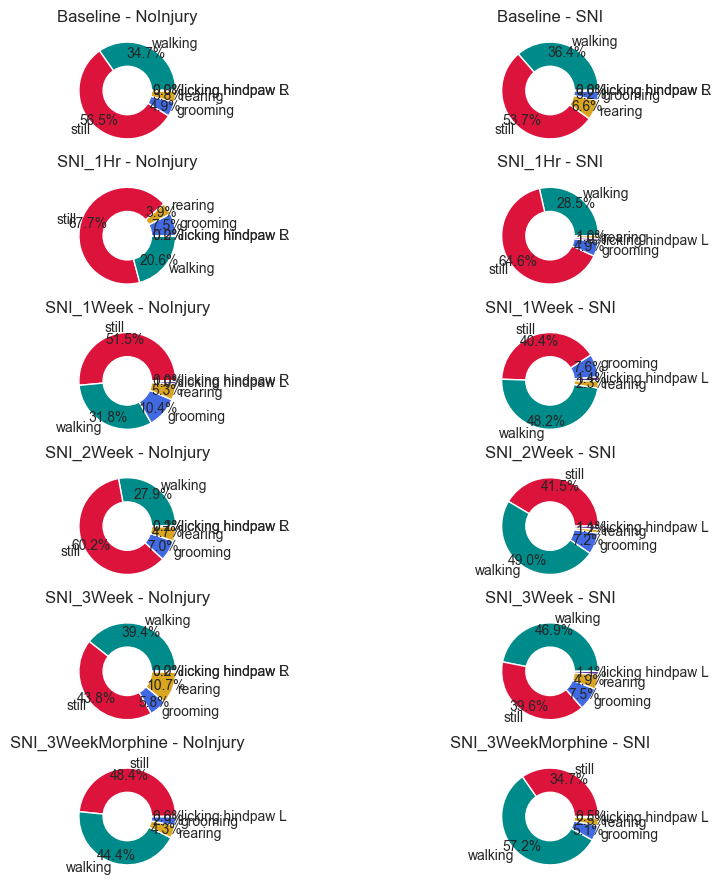

In [2]:
###### RUN DEPENDENCIES ######
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))
from utils.classification import load_behaviors
from utils.meta import *

###### Load Behaviors ######
behaviors = load_behaviors(f"../processed_dataset/{project_name}/behaviors_{project_name}.pkl")

# Define the directory path
directory_path = f"../processed_dataset/{project_name}/figures/behavior_total-frames"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    
rows = len(selected_groups)
cols = len(selected_conditions)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 11))
for row in range(rows):
    if row > 10:
        cols = 1
        fig.delaxes(ax[row, 1])
        fig.delaxes(ax[row, 2])
    else:
        cols = len(selected_conditions)
        
    for col in range(cols):
        
        selected_group = selected_groups[row]
        selected_condition = selected_conditions[col]

        if selected_group in behaviors and selected_condition in behaviors[selected_group]:
            file_keys = list(behaviors[selected_group][selected_condition].keys())
            
            predict_dict = {
                'condition': np.repeat(
                    selected_condition,
                    len(np.hstack([behaviors[selected_group][selected_condition][file_name] for file_name in file_keys]))
                ),
                'behavior': np.hstack([behaviors[selected_group][selected_condition][file_name] for file_name in file_keys])
            }
            df_raw = pd.DataFrame(data=predict_dict)
            labels = df_raw['behavior'].value_counts(sort=False).index
            values = df_raw['behavior'].value_counts(sort=False).values
            # summary dataframe
            df = pd.DataFrame()
            behavior_labels = []
            for l in labels:
                behavior_labels.append(behavior_names[int(l)])
            df["values"] = values
            df['labels'] = behavior_labels
            df["colors"] = df["labels"].apply(lambda x:
                                              behavior_colors[behavior_names.index(x)])  # to connect Column value to Color in Dict
            df.to_csv(f"../processed_dataset/{project_name}/figures/behavior_total-frames/behavior_total_frames_{project_name}_{selected_group}-{selected_condition}.csv")

            # Pie Chart
            ax[row, col].pie(df['values'],
                             colors=df['colors'], 
                             labels=df['labels'],
                             autopct='%1.1f%%', 
                             pctdistance=0.85)
            # draw circle
            centre_circle = plt.Circle((0, 0), 
                                       0.50, 
                                       fc='white')
            # Adding Circle in Pie chart
            ax[row, col].add_artist(centre_circle)
            ax[row, col].set_title(f'{selected_group} - {selected_condition}')
            count += 1
        
        fig.savefig(f"../processed_dataset/{project_name}/figures/behavior_total-frames/behavior_total-frames_{project_name}.svg", 
                    dpi=600, bbox_inches='tight')
        
plt.show()

# ANALYSIS COMPLETE!